In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib import ticker, cm
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib inline

In [7]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [8]:
orig_cmap = matplotlib.cm.nipy_spectral
shrunk_cmap = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=0.85, name='shrunk')

In [13]:
PCE_1E17 = np.loadtxt('PCE_SvsB_1E17.txt')
B= np.loadtxt('SvsB_B.txt')
S= np.loadtxt('SvsB_S.txt')

In [17]:
Z1 = PCE_1E17
X, Y = np.meshgrid(S, B)

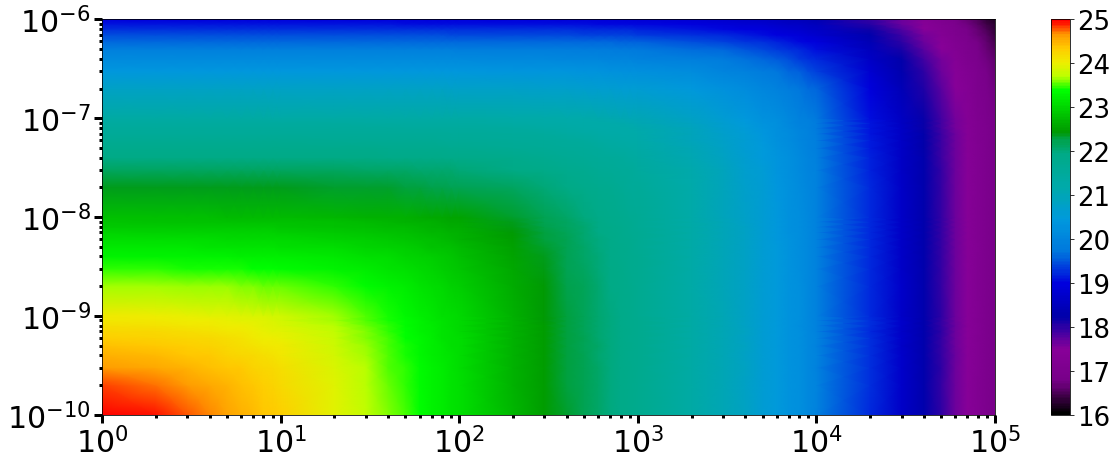

In [18]:
fig= plt.figure(figsize=(20,16))
ax = fig.add_subplot(2, 1, 1)

ax.set_yscale('log')
ax.set_xscale('log')

#extent=[X.min(), X.max(), Y.min(), Y.max()]
#demo_locatable_axes_easy(ax, Z, extent)


Z_min, Z_max = Z1.min(), Z1.max()

c = ax.pcolormesh(X,Y, Z1, cmap= shrunk_cmap, shading='gouraud',vmin=16, vmax=25)

ax.set_aspect('auto')

ax.tick_params(axis='both', which='major', labelsize=30,length=8, width=3)
ax.tick_params(axis='both', which='minor', labelsize=8,length=3, width=3)

#ax.grid(which='minor', axis='both', linestyle='--', color='k', linewidth=1)
cbar = fig.colorbar(c, ax = ax) 
cbar.ax.tick_params(labelsize=26)
plt.axis(aspect='image');
plt.savefig('PCEvsBS.jpg')
plt.show()

In [21]:
Z2 = np.loadtxt('PCE_SvsB_1E15.txt')

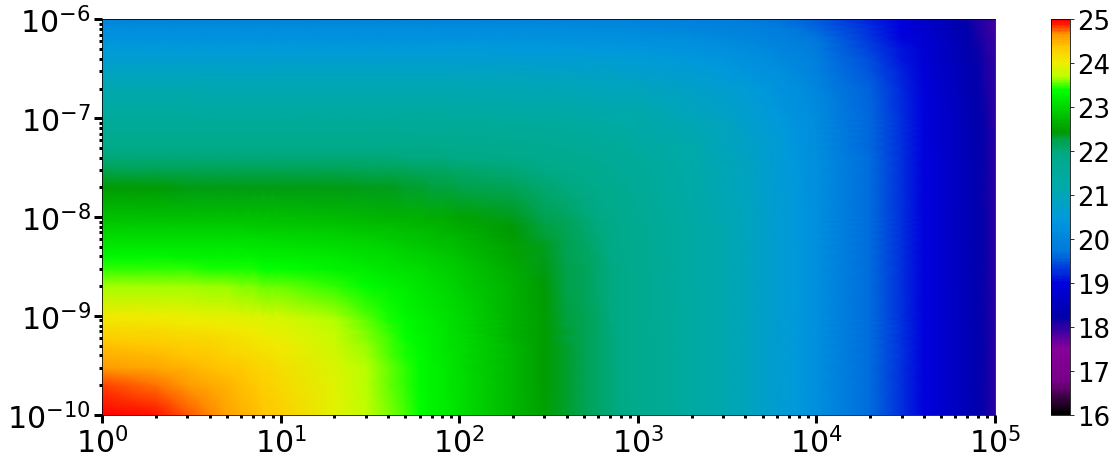

In [23]:
fig= plt.figure(figsize=(20,16))
ax = fig.add_subplot(2, 1, 1)

ax.set_yscale('log')
ax.set_xscale('log')

#extent=[X.min(), X.max(), Y.min(), Y.max()]
#demo_locatable_axes_easy(ax, Z, extent)


Z_min, Z_max = Z2.min(), Z2.max()

c = ax.pcolormesh(X, Y, Z2, cmap= shrunk_cmap, shading='gouraud',vmin=16, vmax=25)

ax.set_aspect('auto')

ax.tick_params(axis='both', which='major', labelsize=30,length=8, width=3)
ax.tick_params(axis='both', which='minor', labelsize=8,length=3, width=3)

#ax.grid(which='minor', axis='both', linestyle='--', color='k', linewidth=1)
cbar = fig.colorbar(c, ax = ax) 
cbar.ax.tick_params(labelsize=26)
plt.axis(aspect='image');
plt.savefig('PCEvsBS1E15.jpg')
plt.show()

In [34]:
PCE_Sn1E5_ETL = np.loadtxt('PCE_Sn_1E5_ETLside_B_5Emin10.txt')
PCE_Sn1E5_HTL = np.loadtxt('PCE_Sn_1E5_HTLside_B_5Emin10.txt')
PCE_Sp1E5_ETL = np.loadtxt('PCE_Sp_1E5_ETLside_B_5Emin10.txt')
PCE_Sp1E5_HTL = np.loadtxt('PCE_Sp_1E5_HTLside_B_5Emin10.txt')
PCE_Sn1E3_ETL = np.loadtxt('PCE_Sn_1E3_ETLside_B_5Emin10.txt')
PCE_Sn1E3_HTL = np.loadtxt('PCE_Sn_1E3_HTLside_B_5Emin10.txt')

In [35]:
Nion = PCE_Sn1E5_ETL[0,:]
PCE11 = PCE_Sn1E5_ETL[1,:]
PCE12 = PCE_Sn1E5_HTL[1,:]
PCE21 = PCE_Sp1E5_ETL[1,:]
PCE22 = PCE_Sp1E5_HTL[1,:]
PCE31 = PCE_Sn1E3_ETL[1,:]
PCE32 = PCE_Sn1E3_HTL[1,:]

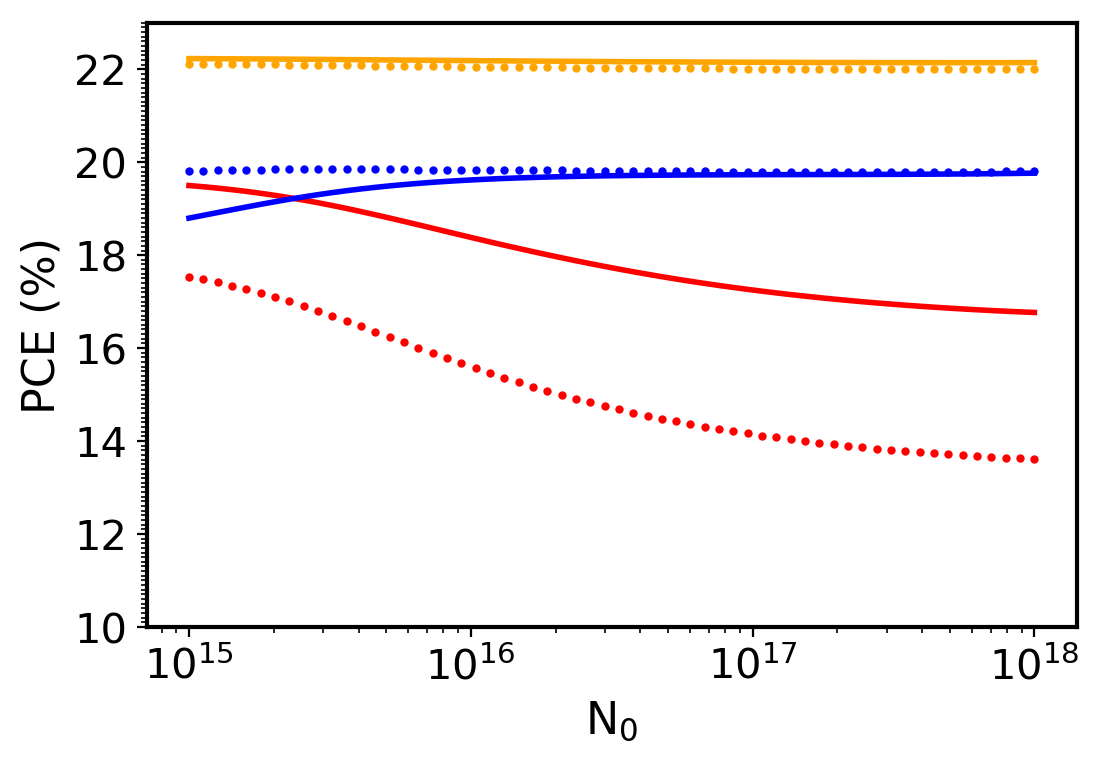

In [36]:
minorLocator_x = MultipleLocator(0.2)
majorLocator_x = MultipleLocator(2)
minorLocator_y = MultipleLocator(0.1)
majorLocator_y = MultipleLocator(2)

fig = plt.figure(num=None, dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)
plt.rcParams['axes.linewidth'] = 1.5
ax1.xaxis.set_minor_locator(minorLocator_x)
ax1.xaxis.set_major_locator(majorLocator_x)
ax1.yaxis.set_minor_locator(minorLocator_y)
ax1.yaxis.set_major_locator(majorLocator_y)
ax1.set_ylim(10,23)
ax1.set_xscale('log')
ax1.set_xlabel(r'N$_{0}$',fontsize=16)
ax1.set_ylabel(r'PCE (%)',fontsize=16)
ax1.plot(Nion, PCE11, '-r', linewidth=2)
ax1.plot(Nion, PCE12, 'ro', markersize=2)
ax1.plot(Nion, PCE21, '-b', linewidth=2)
ax1.plot(Nion, PCE22, 'bo', markersize=2)
ax1.plot(Nion, PCE32, 'o', color = 'orange', markersize=2)
ax1.plot(Nion, PCE31, '-', color = 'orange',linewidth=2)

ax1.tick_params(axis='both', which='major', labelsize=15)
# get handles
handles, labels = ax1.get_legend_handles_labels()
# use them in the legend
ax1.legend(handles, labels, loc='upper left',numpoints=1, frameon=False,fontsize=8.5)
plt.show()
fig.savefig('Fig_PCEvsN0.TIFF',bbox_inches='tight')